maxIndex = cat
minIndex = mozhaysk
5.900951571371747
2.62700978639226


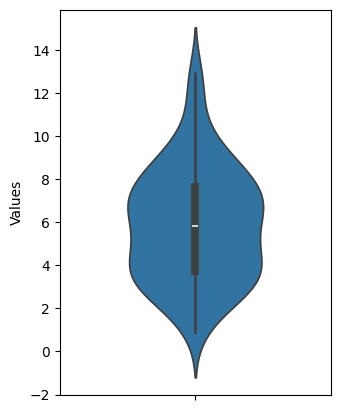

In [2]:
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('glove.csv')
df.set_index('V1',inplace=True)


def get_row_index(df, row_name):
    return df.index.get_loc(row_name)

def dot_product(df, Row1, Row2):
    return df.loc[Row1].dot(df.loc[Row2])

def normalizeSum(row):
    return row / np.sqrt(np.sum(row**2))

def normalizeMean(row):
    return row / np.sqrt(np.mean(row**2))

df_normalizedMean = df.apply(normalizeMean, axis=1)

#找到最大最小点乘的向量

max,min,maxDot,minDot,temp = [0,0,0,0,0]

for index, row in df_normalizedMean.iterrows():
    temp = row.dot(df_normalizedMean.iloc[2926])
    if (temp > maxDot) & (index != 'dog') :
        maxDot = temp
        max = get_row_index(df_normalizedMean,index)
        maxIndex = index
    elif temp < minDot :
        minDot = temp
        min = get_row_index(df_normalizedMean,index)
        minIndex = index
print(f'maxIndex = {maxIndex}')
print(f'minIndex = {minIndex}')

averages = []
for _ in range(100):  # 重复100次
    vectors = df_normalizedMean.sample(10)  # 随机选择10个向量
    inner_products = []  # 存储这10个向量之间的所有内积

    for v1, v2 in combinations(vectors.values, 2):  # 计算每两个向量之间的内积
        inner_product = np.dot(v1, v2)
        inner_products.append(inner_product)

    average = np.mean(inner_products)  # 计算所有内积的平均值
    averages.append(average)

overall_average = np.mean(averages)  # 计算100次迭代的平均内积的平均值
overall_std = np.std(averages)
print(overall_average)
print(overall_std)

# 将数组转换为DataFrame
result = pd.DataFrame(averages, columns=['Values'])

fig = plt.figure(figsize=(3.5,5))
sns.violinplot(y=result['Values'],width=0.5,inner='box')


plt.show()


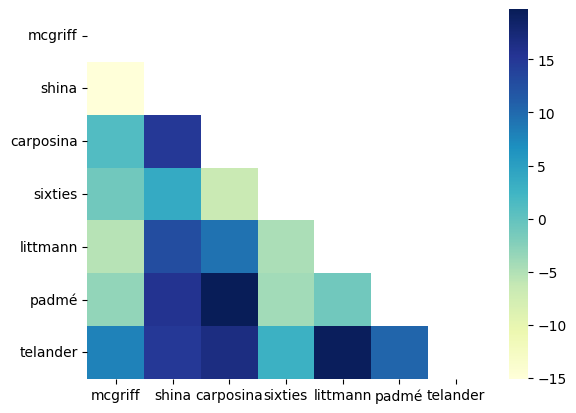

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 假设你的DataFrame是df
# df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)))

# 随机选择7个向量
selected_vectors = df_normalizedMean.sample(7)

# 计算这7个向量之间的内积
inner_products = np.dot(selected_vectors, selected_vectors.T)

# 创建一个掩码，只显示下半部分
mask = np.triu(np.ones_like(inner_products, dtype=bool))

# 使用seaborn的heatmap函数来绘制内积矩阵图
sns.heatmap(inner_products, mask=mask, cmap='YlGnBu', xticklabels=selected_vectors.index, yticklabels=selected_vectors.index)

plt.show()


In [23]:
def dot_product(df, Row1, Row2):
    return df.loc[Row1].dot(df.loc[Row2])
npDot = np.dot(df_normalizedMean.loc['dog'].values,df_normalizedMean.loc['cat'].values)
dotProduct = dot_product(df_normalizedMean,'dog','cat')
print(f'npDot = {npDot}\ndotProduct = {dotProduct} ')

npDot = 46.09002636884625
dotProduct = 46.09002636884625 
